In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

In [2]:
data=pd.read_excel(r"C:\Users\siva\Downloads\Sample_Longlist_Data.xlsx")

In [3]:
data.head()

,Date Added,category,sellerlink,sellerlink-url,sellerstorefront-url,sellerproductcount,sellerratings,sellerdetails,seller business name,businessaddress,Count of seller brands,Max % of negative seller ratings - last 30 days,Max % of negative seller ratings - last 90 days,Max % of negative seller ratings - last 12 months,Hero Product 1 #ratings,Hero Product 2 #ratings,Sample brand name,Sample Brand URL
0,2020-11-15,Garden,Seller 1,Seller 1-link,Seller 1-storefrontlink,"1-16 of over 100,000 results",88% positive in the last 12 months (118 ratings),Lohas Living Inc James Mazzello US 845 3RD Ave...,Business Name:Lohas Living Inc,411 THEODORE FREMD AVESTE 206 SOUTHRyeNY10580-...,16,17,11,12,5873,4957,Visit the YAMAZAKI Store,https://www.amazon.de/-/en/stores/YAMAZAKI/pag...
1,2020-11-15,Garden,Seller 2,Seller 2-link,Seller 2-storefrontlink,NaN,90% positive in the last 12 months (566 ratings),Herzlich Willkommen im Amazon Shop von 1a-Hand...,Business Name:1a-Handelsagentur,1a HandelsagenturLindenallee 2MalchowMecklenbu...,0,2,2,9,0,0,Visit the tesa Store,https://www.amazon.de/-/en/stores/tesa/page/12...
2,2020-11-15,Garden,Seller 3,Seller 3-link,Seller 3-storefrontlink,"1-16 of over 2,000 results",85% positive in the last 12 months (75 ratings),67878u6i7 is committed to providing each custo...,Business Name:nantongaohuanfangzhipinyouxiango...,zhongnanshijicheng27zhuang1410haochongchuanqun...,15,0,25,12,164,162,TXYFYP,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
3,2020-11-15,Garden,Seller 4,Seller 4-link,Seller 4-storefrontlink,1-16 of 123 results,NaN,7 days home life supermarket is committed to p...,Business Name:Zhengzhou Yaoqiong Trading Company,河南省中兴南路福禄街自贸试验区郑州片区（郑东）河南商会大厦1901室450000CN,1,0,0,0,0,0,SHIFENG,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...
4,2020-11-15,Garden,Seller 5,Seller 5-link,Seller 5-storefrontlink,"1-16 of over 1,000 results",81% positive in the last 12 months (52 ratings),78 68yui678 is committed to providing each cus...,Business Name:shenzhenfeichangshangmeimaoyiyou...,minzhidadaoshaxialaocun94dongA901longhuaxinqus...,16,0,31,15,224,113,YUOKI99,https://www.amazon.de/-/en/s/ref=bl_dp_s_web_0...


In [4]:
data['sellerproductcountModified']=[i.split(' ')[-2] if type(i)==str  else  np.nan for i in data['sellerproductcount']]

In [5]:
data['positive_rating']=[i.split(' ')[0] if type(i)==str  else  np.nan for i in data['sellerratings']]

In [6]:
# Extract percentage and total ratings
data['positive_percentage'] = data['sellerratings'].str.extract(r'(\d+)%')
data['total_ratings'] = data['sellerratings'].str.extract(r'\((\d+) (?:total )?ratings\)')

# Convert to numeric
data['positive_percentage'] = pd.to_numeric(data['positive_percentage'], errors='coerce')
data['total_ratings'] = pd.to_numeric(data['total_ratings'], errors='coerce')

# Apply logic:
# - If "total ratings" exists, apply percentage formula.
# - Otherwise, extract total ratings directly.
data['count_positive_rating'] = data.apply(
    lambda row: round(row['positive_percentage'] / 100 * row['total_ratings']) 
    if pd.notna(row['positive_percentage']) and pd.notna(row['total_ratings']) and "total ratings" in str(row['sellerratings']).lower()
    else row['total_ratings'], axis=1
)

In [7]:
# Function to extract email or return 'No email'
def extract_email(text):
    if pd.isna(text):
        return "No email"
    match = re.search(r'[\w\.-]+@[\w\.-]+\.\w+', text)
    return match.group(0) if match else "No email"

# Apply function to DataFrame
data['email'] = data['sellerdetails'].apply(extract_email)

data[['sellerdetails','email']].to_csv('email.csv')

In [8]:
# Function to check last 2 letters
def extract_location(address):
    if pd.isna(address):
        return "No location"
    
    country_code = address[-2:].upper()  # Get the last two letters
    return country_code if country_code in ["US", "DE", "CN"] else "No location"

# Apply function to DataFrame
data['location'] = data['businessaddress'].apply(extract_location)

In [9]:
data.columns

Index(['Date Added', 'category', 'sellerlink', 'sellerlink-url',
       'sellerstorefront-url', 'sellerproductcount', 'sellerratings',
       'sellerdetails', 'seller business name', 'businessaddress',
       'Count of seller brands',
       'Max % of negative seller ratings - last 30 days',
       'Max % of negative seller ratings - last 90 days',
       'Max % of negative seller ratings - last 12 months',
       'Hero Product 1 #ratings', 'Hero Product 2 #ratings',
       'Sample brand name', 'Sample Brand URL', 'sellerproductcountModified',
       'positive_rating', 'positive_percentage', 'total_ratings',
       'count_positive_rating', 'email', 'location'],
      dtype='object')

In [10]:
data.drop(columns=['positive_percentage', 'total_ratings'],inplace=True)

In [11]:
df=data.copy()

### Seller Distribution by Country

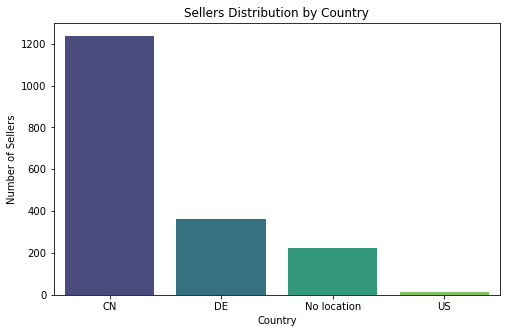

In [12]:
# Count sellers by country
country_counts = df['location'].value_counts()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='viridis')
plt.xlabel("Country")
plt.ylabel("Number of Sellers")
plt.title("Sellers Distribution by Country")
plt.show()


### Correlation Analysis

#### We’ll check how various features impact seller success.

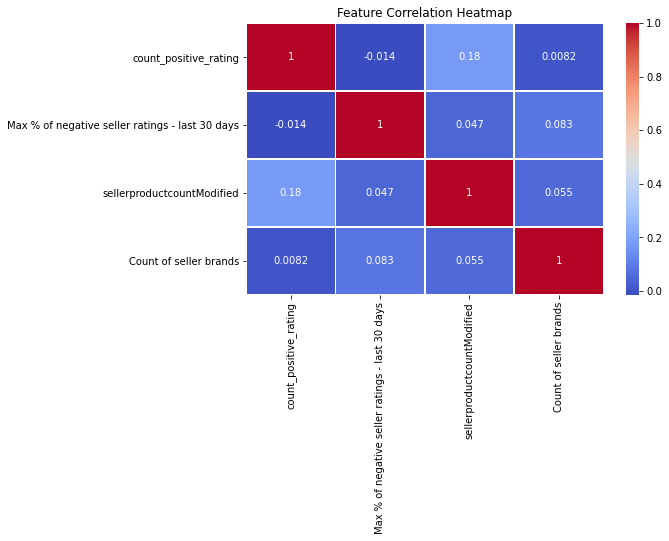

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns that need cleaning
num_cols = ['count_positive_rating', 'Max % of negative seller ratings - last 30 days',
            'sellerproductcountModified', 'Count of seller brands']

# Convert columns: Remove commas and convert to float
df[num_cols] = df[num_cols].replace({',': ''}, regex=True).astype(float)

# Compute correlation matrix
correlation_matrix = df[num_cols].corr()

# Plot heatmap
plt.figure(figsize=(8,5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


### Top Brands by Seller Count
#### Identify the most frequently appearing brands.

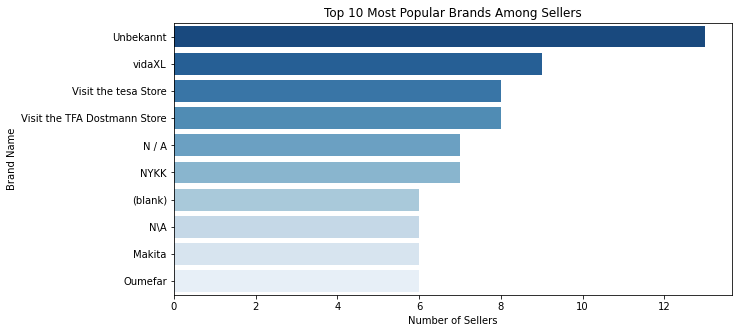

In [14]:
# Count brands
top_brands = df['Sample brand name'].value_counts().head(10)

# Plot
plt.figure(figsize=(10,5))
sns.barplot(y=top_brands.index, x=top_brands.values, palette='Blues_r')
plt.xlabel("Number of Sellers")
plt.ylabel("Brand Name")
plt.title("Top 10 Most Popular Brands Among Sellers")
plt.show()

### Product Count vs. Rating Count Scatter Plot
#### Check whether more products lead to better ratings.

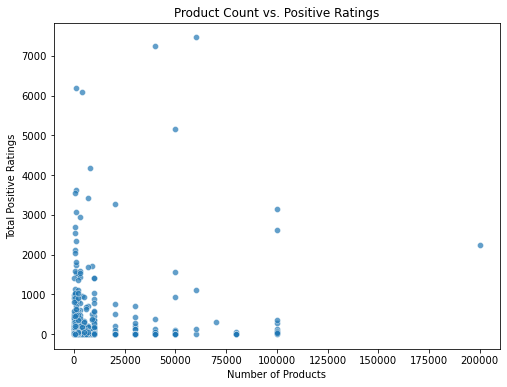

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=df['sellerproductcountModified'], y=df['count_positive_rating'], alpha=0.7)
plt.xlabel("Number of Products")
plt.ylabel("Total Positive Ratings")
plt.title("Product Count vs. Positive Ratings")
plt.show()

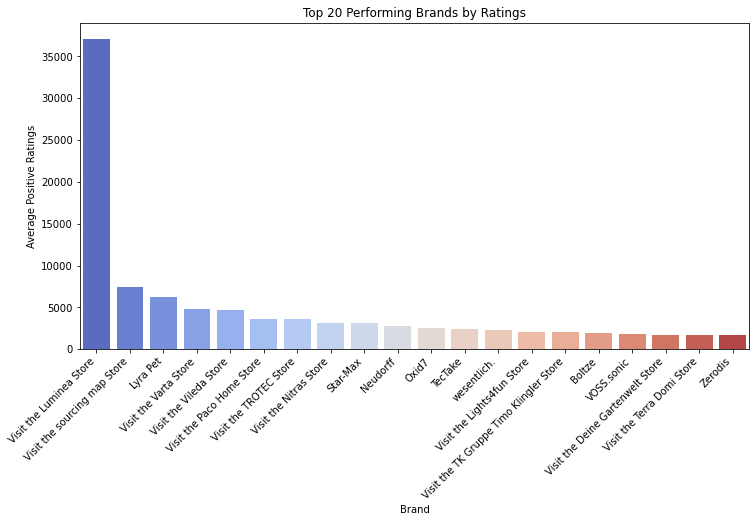

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure numeric conversion
df['count_positive_rating'] = pd.to_numeric(df['count_positive_rating'], errors='coerce')
df['sellerproductcountModified'] = pd.to_numeric(df['sellerproductcountModified'], errors='coerce')

# Drop missing brand names
df = df.dropna(subset=['Sample brand name'])

# Aggregate by brand
brand_summary = df.groupby('Sample brand name')[['count_positive_rating', 'sellerproductcountModified']].mean()

# Sort brands by average positive rating
brand_summary = brand_summary.sort_values(by='count_positive_rating', ascending=False)

# Select top N brands for readability
top_n = 20  # Adjust if needed
brand_summary = brand_summary.head(top_n)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=brand_summary.index, y=brand_summary['count_positive_rating'], palette='coolwarm')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel("Brand")
plt.ylabel("Average Positive Ratings")
plt.title(f"Top {top_n} Performing Brands by Ratings")
plt.show()

### Apply Filtering Criteria

In [17]:
# Convert numeric columns
numeric_cols = ['count_positive_rating', 'Max % of negative seller ratings - last 30 days',
                'sellerproductcountModified', 'Count of seller brands']
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Apply selection filters
filtered_df = df[
    (df['count_positive_rating'] >= 30) &  # At least 50 positive ratings
    (df['Max % of negative seller ratings - last 30 days'] <= 10) &  # Max 10% negative ratings in 30 days
    (df['sellerproductcountModified'] >= 5) &  # At least 5 products
    (df['Count of seller brands'] >= 1) &  # At least 1 brand
    (df['email'].notna()) &  # Email should be available
    (df['location'].isin(['US', 'DE']))  # Preferred locations
]

print(f"Filtered Sellers: {len(filtered_df)} out of {len(df)}")


Filtered Sellers: 212 out of 1835


## Calculate Seller Score
### We’ll rank sellers based on weighted factors.

In [18]:
from sklearn.preprocessing import MinMaxScaler

# Define columns for scoring
scoring_columns = ['count_positive_rating', 'Max % of negative seller ratings - last 30 days',
                   'sellerproductcountModified', 'Count of seller brands']

# Normalize data (scale between 0 and 1)
scaler = MinMaxScaler()
filtered_df[scoring_columns] = scaler.fit_transform(filtered_df[scoring_columns])

# Define weights
weights = {
    'count_positive_rating': 0.30,
    'Max % of negative seller ratings - last 30 days': -0.20,  # Negative impact
    'sellerproductcountModified': 0.25,
    'Count of seller brands': 0.15
}

# Compute weighted seller score
filtered_df['Seller Score'] = (
    filtered_df['count_positive_rating'] * weights['count_positive_rating'] +
    filtered_df['Max % of negative seller ratings - last 30 days'] * weights['Max % of negative seller ratings - last 30 days'] +
    filtered_df['sellerproductcountModified'] * weights['sellerproductcountModified'] +
    filtered_df['Count of seller brands'] * weights['Count of seller brands']
)

# Rank sellers in descending order
filtered_df = filtered_df.sort_values(by='Seller Score', ascending=False)

# Display top-ranked sellers
filtered_df[['seller business name', 'Seller Score', 'count_positive_rating',
             'Max % of negative seller ratings - last 30 days', 'sellerproductcountModified', 
             'Count of seller brands']]

<ipython-input-18-132eb35c79e8>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[scoring_columns] = scaler.fit_transform(filtered_df[scoring_columns])
<ipython-input-18-132eb35c79e8>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Seller Score'] = (


,seller business name,Seller Score,count_positive_rating,Max % of negative seller ratings - last 30 days,sellerproductcountModified,Count of seller brands
33,Business Name:Tkog Iwy INC,0.401872,0.006240,0.0,1.000000,1.000000
726,Business Name:trendmile GmbH,0.389970,1.000000,0.8,0.399880,1.000000
985,"Business Name:Schreibwaren Wegmann, Inh. Janos...",0.353852,0.046173,0.3,1.000000,1.000000
31,Business Name:Dinan LLC,0.350323,0.001109,0.0,0.799960,1.000000
36,Business Name:itenga GmbH,0.337953,0.709928,0.7,0.499900,0.933333
...,...,...,...,...,...,...
961,Business Name:WATTSTUNDE GmbH,-0.028708,0.037022,0.6,0.000740,0.533333
1049,Business Name:Wolldiscount24 GmbH,-0.108910,0.001941,1.0,0.002030,0.600000
758,Business Name:Gerald Grillmeier,-0.132567,0.023433,0.7,0.001610,0.000000
580,Business Name:Orkan Haksal,-0.143703,0.120355,1.0,0.000760,0.133333


### Top 10 Sellers for Acquisition

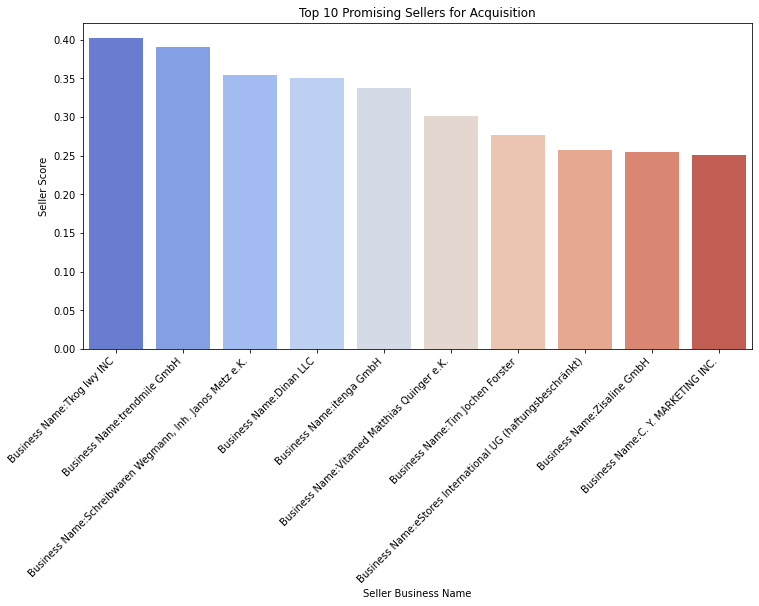

In [19]:

# Select top 10 sellers
top_sellers = filtered_df.head(10)

plt.figure(figsize=(12,6))
sns.barplot(x='seller business name', y='Seller Score', data=top_sellers, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Promising Sellers for Acquisition')
plt.ylabel('Seller Score')
plt.xlabel('Seller Business Name')
plt.show()


In [20]:
import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

# Create dropdown for seller selection
seller_dropdown = widgets.Dropdown(
    options=filtered_df['seller business name'].unique(),
    description='Seller:',
    style={'description_width': 'initial'}
)

# Function to update gauge
def update_gauge(seller_name):
    seller_data = filtered_df[filtered_df['seller business name'] == seller_name]
    if seller_data.empty:
        print("No data available for the selected seller.")
        return
    
    score = seller_data['Seller Score'].values[0]
    
    fig = go.Figure(go.Indicator(
        mode="gauge+number",
        value=score,
        title={'text': f"Seller Score: {seller_name}"},
        gauge={
            'axis': {'range': [0, 1]},  # Since MinMaxScaler normalizes between 0-1
            'bar': {'color': "blue"},
            'steps': [
                {'range': [0, 0.3], 'color': "lightgray"},
                {'range': [0.3, 0.7], 'color': "lightgreen"},
                {'range': [0.7, 1], 'color': "darkgreen"}
            ]
        }
    ))
    fig.show()

# Display dropdown and gauge
widgets.interactive(update_gauge, seller_name=seller_dropdown)

interactive(children=(Dropdown(description='Seller:', options=('Business Name:Tkog Iwy INC', 'Business Name:tr…

In [ ]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Convert Date Added to datetime
df['Date Added'] = pd.to_datetime(df['Date Added'])

# Dropdown for selecting a seller
seller_dropdown = widgets.Dropdown(
    options=df['seller business name'].unique(),
    description="Select Seller:",
    style={'description_width': 'initial'}
)

# Function to forecast seller performance
def forecast_seller(seller_name):
    seller_data = df[df['seller business name'] == seller_name]
    
    if seller_data.empty:
        print("No data available for the selected seller.")
        return
    
    # Aggregate data by date
    time_series = seller_data.groupby('Date Added')['count_positive_rating'].sum().reset_index()
    time_series.columns = ['ds', 'y']  # Prophet requires columns ds (date) & y (value)

    # Initialize & train Prophet model
    model = Prophet()
    model.fit(time_series)

    # Future dataframe for predictions
    future = model.make_future_dataframe(periods=30)  # Predict next 30 days
    forecast = model.predict(future)

    # Plot forecast
    fig, ax = plt.subplots(figsize=(10, 5))
    model.plot(forecast, ax=ax)
    plt.title(f"Forecast for {seller_name} (Positive Ratings)")
    plt.xlabel("Date")
    plt.ylabel("Positive Ratings")
    plt.show()

# Display dropdown and forecast
display(seller_dropdown)
widgets.interactive(forecast_seller, seller_name=seller_dropdown)
